# Image Art

Inspired by that one thing I saw in the UMSL Collabitat - my attempt at taking an image and transforming it in ways that are interesting to look at.

In [1]:
import numpy as np
from PIL import Image # import Pillow

from random import *

In [2]:
# load an image
filename = "images/stl1.jpeg"
# filename = "images/blocks.jpg"
with Image.open(filename) as img:
    img.load()

print(type(img))

isinstance(img, Image.Image)

<class 'PIL.JpegImagePlugin.JpegImageFile'>


True

## Display the image

In [3]:
# display the image in system native format (pop up window on mac)
# img.show()

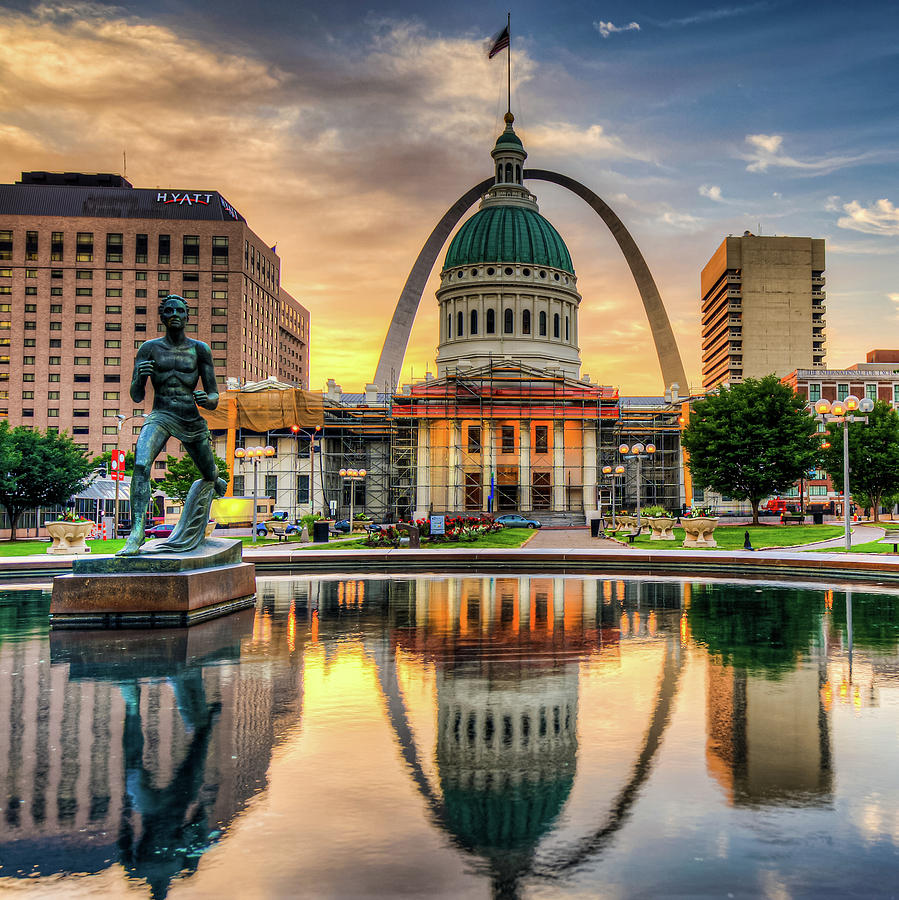

In [4]:
# display the image in notebook
display(img)

In [5]:
# convert to numpy array
img_array = np.asarray(img)

In [6]:
# print details
height,width,bands = img_array.shape
print("y dim = {}".format(height))
print("x dim = {}".format(width))
print("bands = {}".format(bands))

y dim = 900
x dim = 899
bands = 3


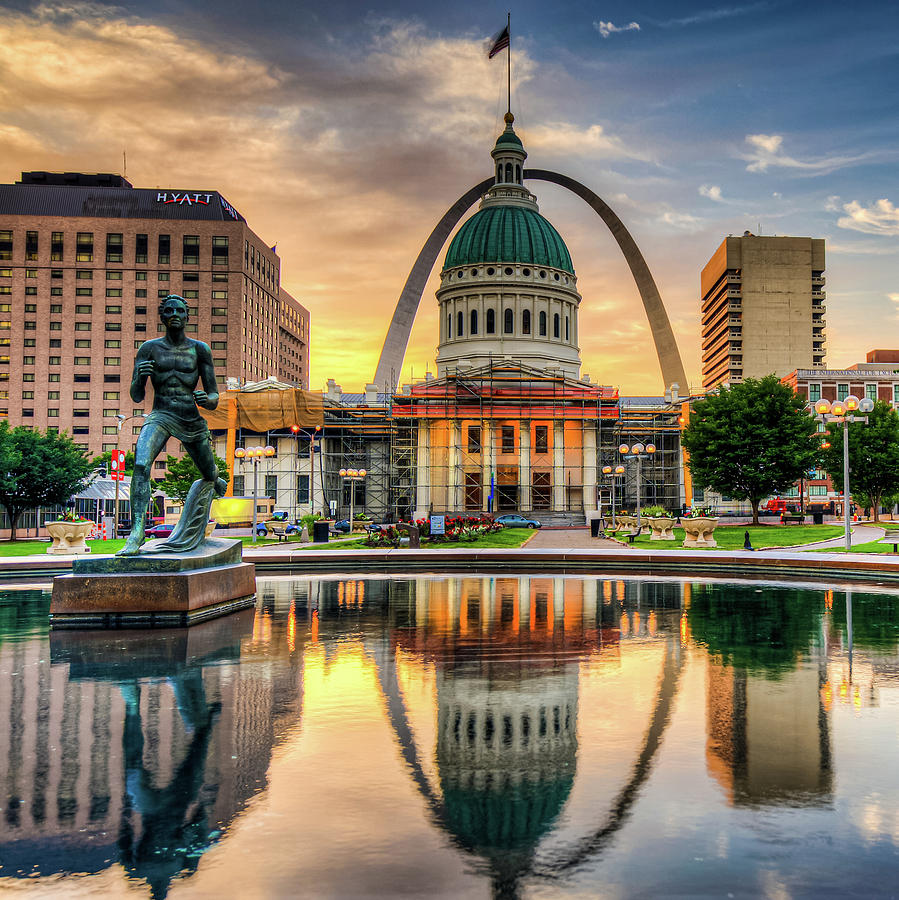

In [7]:
# convert numpy array back to displayable image
display(Image.fromarray(img_array))

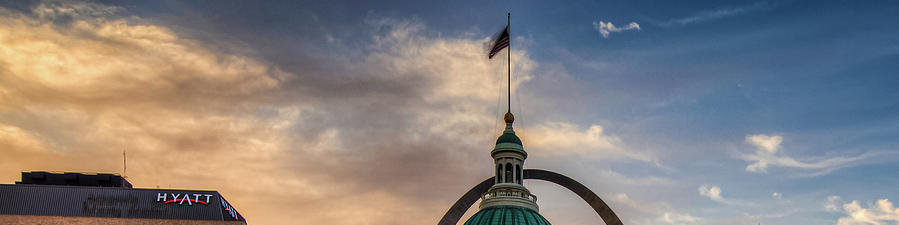

In [8]:
# slice the image
new_h = int(height/4)
new_img = img_array[:new_h,:,:]

display(Image.fromarray(new_img))

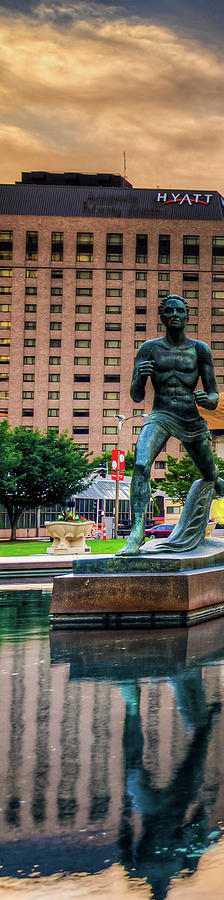

In [9]:
# slice in the other direction
new_w = int(width/4)
new_img = img_array[:,:new_w,:]

display(Image.fromarray(new_img))

In [10]:
new_img.shape

(900, 224, 3)

In [11]:
# img_array[900,0:10,:]

## Random box in image

Random box: [383:583,505:605]


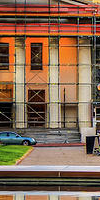

In [12]:
# could possibly turn this into a function that returns a dict
#   def rand_box(img_array, h_size=100, w_size=100):
h_size = 200
w_size = 100
height,width,bands = img_array.shape

# random positions
rand_h_pos = randint(1, height)
rand_w_pos = randint(1, width)

box_h1 = int(rand_h_pos-(h_size/2))
box_h2 = int(rand_h_pos+(h_size/2))

box_w1 = int(rand_w_pos-(w_size/2))
box_w2 = int(rand_w_pos+(w_size/2))

# make sure new coords are within image bounds
if box_h1 < 0: box_h1 = 0
if box_w1 < 0: box_w1 = 0
if box_h2 > height: box_h2 = height
if box_w2 > width: box_w2 = width
    
print("Random box: [{}:{},{}:{}]".format(box_h1,box_h2,box_w1,box_w2))

rand_img_piece = img_array[box_h1:box_h2,box_w1:box_w2,:]
display(Image.fromarray(rand_img_piece))
    
#     return rand_img_piece

## Transform the random box

In [13]:
rand_box_avg = int(np.average(rand_img_piece))

In [14]:
# change all values in the box to the average

shape = (box_h2-box_h1,box_w2-box_w1,3)
value = rand_box_avg
print(shape)
rand_box_xform = np.empty(shape, dtype=int)
rand_box_xform.fill(value)

(200, 100, 3)


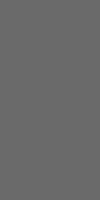

In [15]:
Image.fromarray((rand_box_xform * 1).astype(np.uint8)).convert('RGB')

In [16]:
# need to do this on a per-band basis

In [17]:
# figure out the size of the shape we're transforming
#   we do this because it could be different than simply (h_size, w_size, bands)
#   selections near the image edges will cause this
shape = (box_h2-box_h1,box_w2-box_w1,bands)
print(shape)

# create a new numpy array to hold the tranformed data
rand_box_xform = np.empty(shape, dtype=int)

for i in range(bands):
    rand_box_avg = int(np.average(rand_img_piece[:,:,i]))
    print(i," : ",rand_box_avg)
    rand_box_xform[:,:,i].fill(value)

(200, 100, 3)
0  :  133
1  :  103
2  :  80


In [18]:
rand_box_xform.shape

(200, 100, 3)

In [19]:
newi = Image.fromarray((rand_box_xform).astype(np.uint8)).convert('RGB')

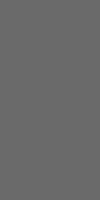

In [20]:
newi

### Look at DOMINANT color instead

https://stackoverflow.com/questions/43111029/how-to-find-the-average-colour-of-an-image-in-python-with-opencv

In [21]:
# avg_patch = np.ones(shape=rand_img_piece.shape, dtype=np.uint8)*np.uint8(average)

# indices = np.argsort(counts)[::-1]   
# freqs = np.cumsum(np.hstack([[0], counts[indices]/float(counts.sum())]))
# rows = np.int_(rand_img_piece.shape[0]*freqs)

# dom_patch = np.zeros(shape=rand_img_piece.shape, dtype=np.uint8)
# for i in range(len(rows) - 1):
#     dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])

### Rotate/flip the piece

https://www.geeksforgeeks.org/python-pillow-flip-and-rotate-images/


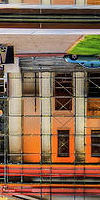

In [22]:
# rotate
img_rot = Image.fromarray(rand_img_piece).transpose(Image.ROTATE_180)

display(img_rot)

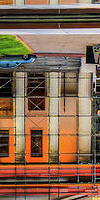

In [23]:
# flip
img_flip = Image.fromarray(rand_img_piece).transpose(Image.FLIP_TOP_BOTTOM)

display(img_flip)


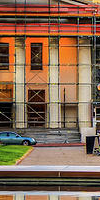

In [24]:
img_flip_back = img_flip.transpose(Image.FLIP_TOP_BOTTOM)

display(img_flip_back)


## Put the piece back into the original image

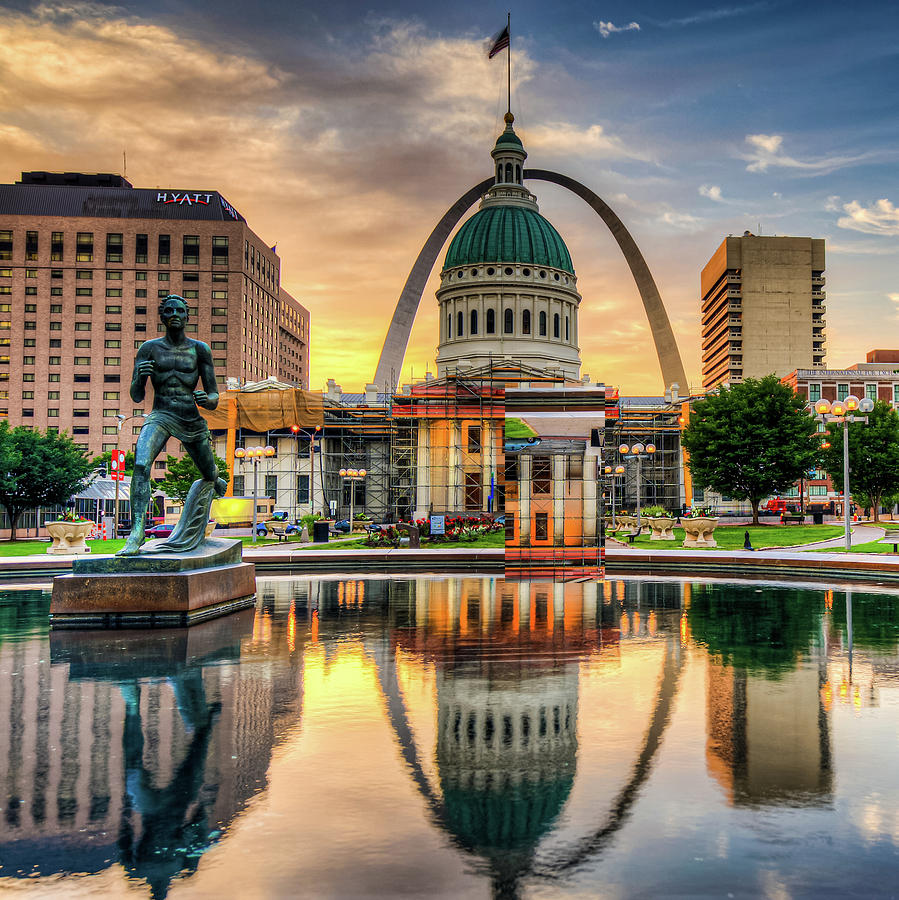

In [25]:
img_out = img.copy()
img_out.paste(img_flip, (box_w1, box_h1)) # position is (x coordinate in upper left, y coordinate in upper left) 

display(img_out)

## Loop this process multiple times

In [26]:
# create a copy of the source image
img_out = img.copy()

In [27]:
def img_art_flips(img, h_size=100, w_size=100):
#     h_size = 200
#     w_size = 100
    height,width,bands = img_array.shape

    # random positions
    rand_h_pos = randint(1, height)
    rand_w_pos = randint(1, width)

    box_h1 = int(rand_h_pos-(h_size/2))
    box_h2 = int(rand_h_pos+(h_size/2))

    box_w1 = int(rand_w_pos-(w_size/2))
    box_w2 = int(rand_w_pos+(w_size/2))

    # make sure new coords are within image bounds
    if box_h1 < 0: box_h1 = 0
    if box_w1 < 0: box_w1 = 0
    if box_h2 > height: box_h2 = height
    if box_w2 > width: box_w2 = width

#     print("Random box: [{}:{},{}:{}]".format(box_h1,box_h2,box_w1,box_w2))

    rand_img_piece = img_array[box_h1:box_h2,box_w1:box_w2,:]
#     display(Image.fromarray(rand_img_piece))


    # flip the random piece
    img_flip = Image.fromarray(rand_img_piece).transpose(Image.FLIP_TOP_BOTTOM)

#     display(img_flip)

    # put the piece back in the original image
    img_out.paste(img_flip, (box_w1, box_h1)) # position is (x coordinate in upper left, y coordinate in upper left) 

#     display(img_out)

In [28]:
img_art_flips(img_out)

### Put it all together in the final form

In [29]:
num_iter = 100
h = 50
w = 25

img_out = img.copy()

for i in range(num_iter):
    img_art_flips(img_out,h,w)
    
# save result to file
img_out.save("images/output.jpg")

# display(img_out) # show the result in this notebook
img_out.show() # show the result in a popup 

### References 

https://realpython.com/image-processing-with-the-python-pillow-library/

https://datagy.io/python-return-multiple-values/

https://note.nkmk.me/en/python-pillow-paste/

https://stackoverflow.com/questions/43111029/how-to-find-the-average-colour-of-an-image-in-python-with-opencv